In [51]:
## This notebook will be used to analyze data from the new_heart_file.csv

import pandas as pd
import numpy as np
import seaborn as sns
import os 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
#from .. import project_functions - invalid syntax

%matplotlib inline


In [69]:
df = pd.read_csv('new_heart_file.csv')

In [77]:
df.head()

,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
0,111,57,1,2,150,126,1,1,173,1
1,301,57,1,0,130,131,0,1,115,0
2,53,44,0,2,108,141,0,1,175,1
3,151,71,0,0,112,149,0,1,125,1
4,267,49,1,2,118,149,0,0,126,0


In [70]:
df.shape
# 303 rows and 10 columns

(303, 10)

In [71]:

df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Chest Pain', 'Resting bp(mmHg)',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate',
       'Result'],
      dtype='object')

In [72]:
df.nunique()

Unnamed: 0             303
Age                     41
Sex                      2
Chest Pain               4
Resting bp(mmHg)        49
Cholesterol            152
Fasting Blood Sugar      2
Resting ECG              3
Max Heart Rate          91
Result                   2
dtype: int64

In [73]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000


In [ ]:
# The removed column "Unnamed: 0" is still present in the dataframe
#need to get rid of it 

In [74]:
# set numeric data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           303 non-null    int64
 1   Age                  303 non-null    int64
 2   Sex                  303 non-null    int64
 3   Chest Pain           303 non-null    int64
 4   Resting bp(mmHg)     303 non-null    int64
 5   Cholesterol          303 non-null    int64
 6   Fasting Blood Sugar  303 non-null    int64
 7   Resting ECG          303 non-null    int64
 8   Max Heart Rate       303 non-null    int64
 9   Result               303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


In [101]:
df['Result']= df['Result'].map({1:'yes', 0:'no'})

In [83]:
df.groupby(by='Sex').size()
#this separates out the men and the women. Showing that there are more men in this study than women
# 0 = female
# 1 = male

Sex
0     96
1    207
dtype: int64

In [82]:
df.head()

,Unnamed: 0,Age,Sex,Chest Pain,Resting bp(mmHg),Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Result
0,111,57,1,2,150,126,1,1,173,yes
1,301,57,1,0,130,131,0,1,115,no
2,53,44,0,2,108,141,0,1,175,yes
3,151,71,0,0,112,149,0,1,125,yes
4,267,49,1,2,118,149,0,0,126,no


Text(0.5, 1.0, 'Number of People by Sex')

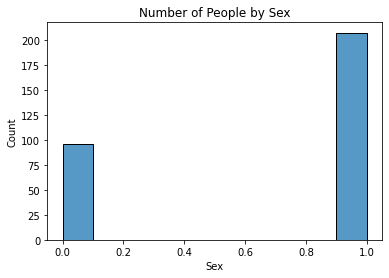

In [100]:
ax = sns.histplot (data = df, x="Sex",stat="count")
ax.set_title ("Number of People by Sex")
# Figure showing that there were obviously more men in this study

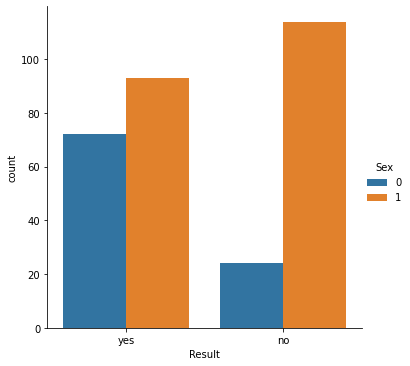

In [91]:
sns.catplot(x="Result", data=df, kind="count", hue="Sex")
#Plot showing that men were more likely to have a heart attack in this sample dataset,than women

# Yes= heart attack
# No= No heart attack

<AxesSubplot:xlabel='Result', ylabel='Age'>

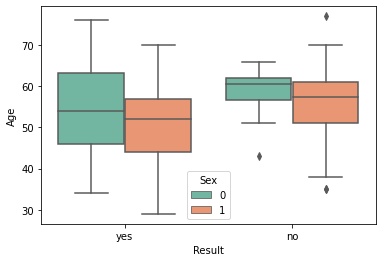

In [92]:
#sns.catplot(x="Result", y="Age", data=df, kind="box")

sns.boxplot(x="Result", y="Age", data=df, hue="Sex",palette = "Set2")
#Boxplot showing the ages of patients against their result of a heart attack or not
